In [498]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [499]:
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [500]:
data = dataset.data
target = dataset.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.33, random_state = 42)

In [501]:
#hàm tính khoảng cách giữa 2 điểm trong tập dữ liệu
def calDistance(p1, p2):
  sum = 0
  #print(p1, p2)
  assert len(p1) == len(p2)
  for i in range(len(p1)):
    sum +=((p1[i] - p2[i])**2)
  return np.sqrt(sum)

In [502]:
#khởi tạo các điểm tâm của clusters bằng cách chọn random trong tập dữ liệu gốc 
def initialCenterPoints(datapoints, number_of_clusters):
  centers = []
  for i in range(number_of_clusters):
    index = np.random.randint(datapoints.shape[0])
    centers.append(datapoints[index, :])
  return np.array(centers)

In [503]:
#phân loại các điểm vào các cụm dựa vào khoảng cách giữa chúng với các center 
def clustering(datapoints, centers):
  y_pred = np.array([])
  #print(centers)
  for n in datapoints:    
    #print('before')
    dis_to_centers = [calDistance(n, cen) for cen in centers]
    #print('after')
    y_pred = np.append(y_pred, np.array(np.argmin(dis_to_centers)))
  return y_pred

In [504]:
#tìm vị trí center mới dựa trên các điểm vừa dự đoán ở trước
def findM_clustedPoints(y_pred, m): #Xác định index của các điểm thuộc cluster m trong tập dữ liệu
  #for i,y in enumerate(y_pred):
  #  print(y,m)
  return [i for i, y in enumerate(y_pred) if y == m]

def findNewCenters(datapoints, previousPrediction, number_of_clusters):
  assert datapoints.shape[0] == len(previousPrediction)
  new_centers = np.array([[]])
  for m in range(number_of_clusters):
    indice_of_points_in_this_cluster = findM_clustedPoints(previousPrediction, m)
    #print(indice_of_points_in_this_cluster)
    new_m_center = np.mean(datapoints[indice_of_points_in_this_cluster, :], axis = 0, keepdims= True)
    #print(new_m_center.shape)
    new_centers = np.append(new_centers, new_m_center, axis = 1)
  #print(new_centers.shape)
  return new_centers.reshape(number_of_clusters,-1)

In [505]:
def kmeans_train(datapoints, labels,number_of_clusters):
  new_centers = initialCenterPoints(datapoints, number_of_clusters)
  y_pred = np.zeros(labels.shape)
  while(True):
    #print(new_centers)
    prev_y_pred = y_pred
    y_pred = clustering(datapoints, new_centers)
    new_centers = findNewCenters(datapoints, y_pred, number_of_clusters)
    
    if calDistance(y_pred, prev_y_pred) == 0:
      break
    
    #print(y_pred)
    #print(len(y_pred))
    #print(len(labels))
    #print(calDistance(y_pred, labels))
  #print(y_pred)
  #print(labels)
  return new_centers

In [506]:
def kmeans_predict(datapoints, centers):
  y_pred = []
  for n in datapoints:
    distances_to_centers = [calDistance(n, cen) for cen in centers]
    y_pred.append(np.argmin(distances_to_centers))
  return y_pred

In [507]:
centers = kmeans_train(X_train, y_train, 3)
prediction = kmeans_predict(X_test, centers)
print("kết quả class dự đoán 10 điểm dữ liệu đầu tiên trên tập test:")
print(prediction[:10])
print("nhãn đúng của chúng:")
print(y_test[:10])

kết quả class dự đoán 10 điểm dữ liệu đầu tiên trên tập test:
[0, 1, 2, 0, 2, 1, 0, 2, 0, 0]
nhãn đúng của chúng:
[1 0 2 1 1 0 1 2 1 1]


In [552]:
#visualize kết quả:
#bộ dữ liệu iris có số chiều các điểm dữ liệu là 4, ta chỉ visualize 2 chiều dữ liệu đầu tiên để dễ quan sát
def visualize(datapoints, true_labels, pred_labels, number_of_clusters):
  def split_clusters(labels):
    classes = []
    for i in range(number_of_clusters):
      classes.append([])
    for i in range(len(datapoints)):
      classes[labels[i]].append(datapoints[i])

    #print(classes)
    return classes
  splited_classes = split_clusters(true_labels)
  pred_classes = split_clusters(pred_labels)

  fig, ax = plt.subplots(2, sharex= True, sharey=True)
  for i,class_points in enumerate(splited_classes):
    #print(i, class_points)
    x = [p[0] for p in class_points]
    y = [p[1] for p in class_points]
    ax[0].scatter(x,y, c=np.random.rand(3,))

  for i,class_points in enumerate(pred_classes):
    #print(i, class_points)
    x = [p[0] for p in class_points]
    y = [p[1] for p in class_points]
    ax[1].scatter(x,y, c=np.random.rand(3,))
  plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

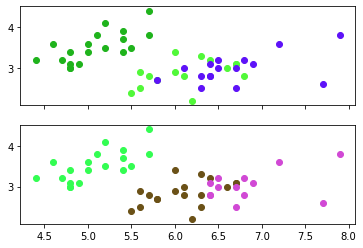

In [553]:
visualize(X_test, y_test, prediction,3)